<a href="https://colab.research.google.com/github/saimathura/deeplearning-MDSC302/blob/main/22233_Assignment_Pretraining_Resnet_FashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
import torchvision

In [ ]:

train_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 170498071/170498071 [00:14<00:00, 11568491.34it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [ ]:
import os
import pandas as pd
from torchvision.io import read_image
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

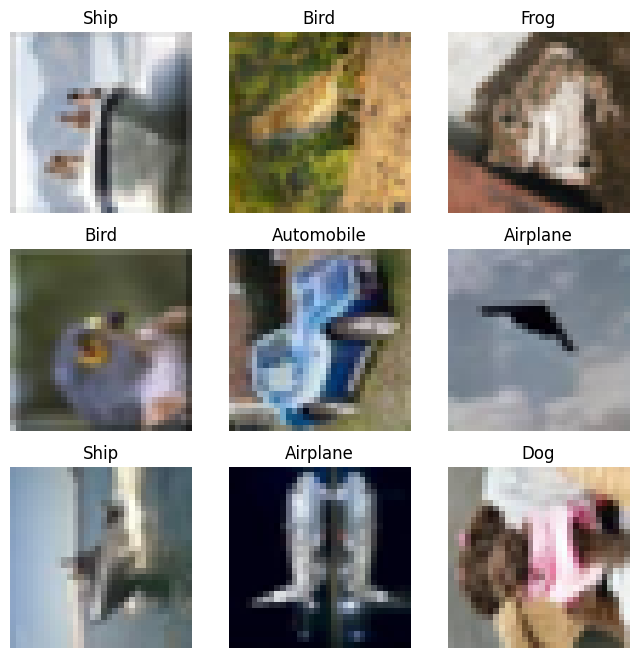

In [ ]:
#Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck.
labels_map = {
    0: "Airplane",
    1: "Automobile",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Ship",
    9: "Truck",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.T, cmap="gray")
plt.show()

In [ ]:
from torch.utils.data import random_split

In [ ]:
train_size = int(0.9 * (len(train_data)))

In [ ]:
val_size = len(train_data) - train_size

In [ ]:
train_set , val_set = random_split(train_data, [train_size, val_size])

In [ ]:
train_set.__len__()

45000

In [ ]:
val_set.__len__()


5000

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
train_dataloader = DataLoader(train_set,batch_size = 64,shuffle = True)
val_dataloader = DataLoader(val_set,batch_size = 64,shuffle = True)
test_dataloader = DataLoader(test_data,batch_size = 64,shuffle = True)

In [ ]:
train_features,train_labels = next(iter(train_dataloader))

In [ ]:
train_features.shape

torch.Size([64, 3, 32, 32])

Feature batch shape: torch.Size([64, 3, 32, 32])
Labels batch shape: torch.Size([64])


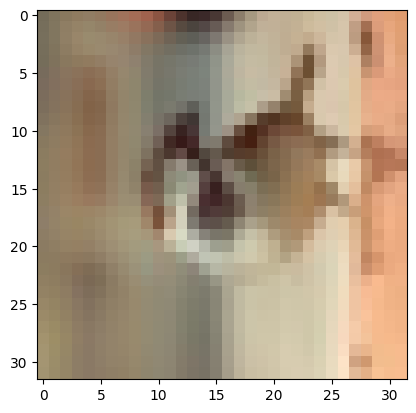

Label: Bird


In [ ]:
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0]
label = train_labels[0]
plt.imshow(img.T, cmap="gray",)
plt.show()
print(f"Label: {labels_map[label.item()]}")

In [ ]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=False)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [ ]:
import torch.nn.functional as F

In [ ]:
import torch.nn as nn

# using optimzer as Adam and the same  neural network from previous

In [ ]:
epochs = 10  # You can adjust the number of epochs as needed

In [ ]:
model = torchvision.models.resnet50(weights = None, progress = True)

In [ ]:
model.fc = nn.Linear(2048,10,bias = True)

In [ ]:

model.cuda()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
device = torch.device("cuda:0")
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)

In [ ]:
epochs = 10  # You can adjust the number of epochs as needed

In [ ]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []# for plotting

In [ ]:
from tqdm.auto import tqdm
for e in tqdm(range(epochs)):
    train_loss = 0.0
    val_loss = 0.0
    train_correct = 0
    train_total = 0
    val_correct = 0
    val_total = 0
    model.train()  # Set the model to training mode

    # Training loop
    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)
        images = F.softmax(images,dim = 1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    # Validation loop
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for val_images, val_labels in val_dataloader:  # Assuming you have a DataLoader named 'val_loader'
            val_images, val_labels = val_images.to(device), val_labels.to(device)
            val_images = F.softmax(val_images,dim = 1)
            val_outputs = model(val_images)
            val_loss += criterion(val_outputs, val_labels).item()
            _, val_predicted = torch.max(val_outputs, 1)
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()

    # Calculate average losses for this epoch
    average_train_loss = train_loss / len(train_dataloader)
    average_val_loss = val_loss / len(val_dataloader)
    train_accuracy = train_correct / train_total * 100
    val_accuracy = val_correct / val_total * 100
    average_train_accuracy = train_accuracy / len(train_dataloader)
    average_val_accuracy = val_accuracy / len(val_dataloader)

    train_losses.append(average_train_loss)
    val_losses.append(average_val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f'Epoch [{e+1}/{epochs}],Train Accuracy: {average_train_accuracy:.4f}, Val Accuracy: {average_val_accuracy:.4f}, Train Loss: {average_train_loss:.4f}, Val Loss: {average_val_loss:.4f}')

print("Training finished")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10],Train Accuracy: 0.0348, Val Accuracy: 0.3704, Train Loss: 2.0796, Val Loss: 2.0760
Epoch [2/10],Train Accuracy: 0.0474, Val Accuracy: 0.4268, Train Loss: 1.8319, Val Loss: 1.8071
Epoch [3/10],Train Accuracy: 0.0550, Val Accuracy: 0.4823, Train Loss: 1.6895, Val Loss: 1.7493
Epoch [4/10],Train Accuracy: 0.0602, Val Accuracy: 0.5329, Train Loss: 1.5899, Val Loss: 1.6142
Epoch [5/10],Train Accuracy: 0.0639, Val Accuracy: 0.5170, Train Loss: 1.5306, Val Loss: 1.6497
Epoch [6/10],Train Accuracy: 0.0671, Val Accuracy: 0.4625, Train Loss: 1.4643, Val Loss: 1.8852
Epoch [7/10],Train Accuracy: 0.0702, Val Accuracy: 0.4701, Train Loss: 1.4134, Val Loss: 1.9432
Epoch [8/10],Train Accuracy: 0.0723, Val Accuracy: 0.5701, Train Loss: 1.3740, Val Loss: 1.5617
Epoch [9/10],Train Accuracy: 0.0746, Val Accuracy: 0.5580, Train Loss: 1.3302, Val Loss: 1.5839
Epoch [10/10],Train Accuracy: 0.0775, Val Accuracy: 0.5033, Train Loss: 1.2845, Val Loss: 1.7982
Training finished


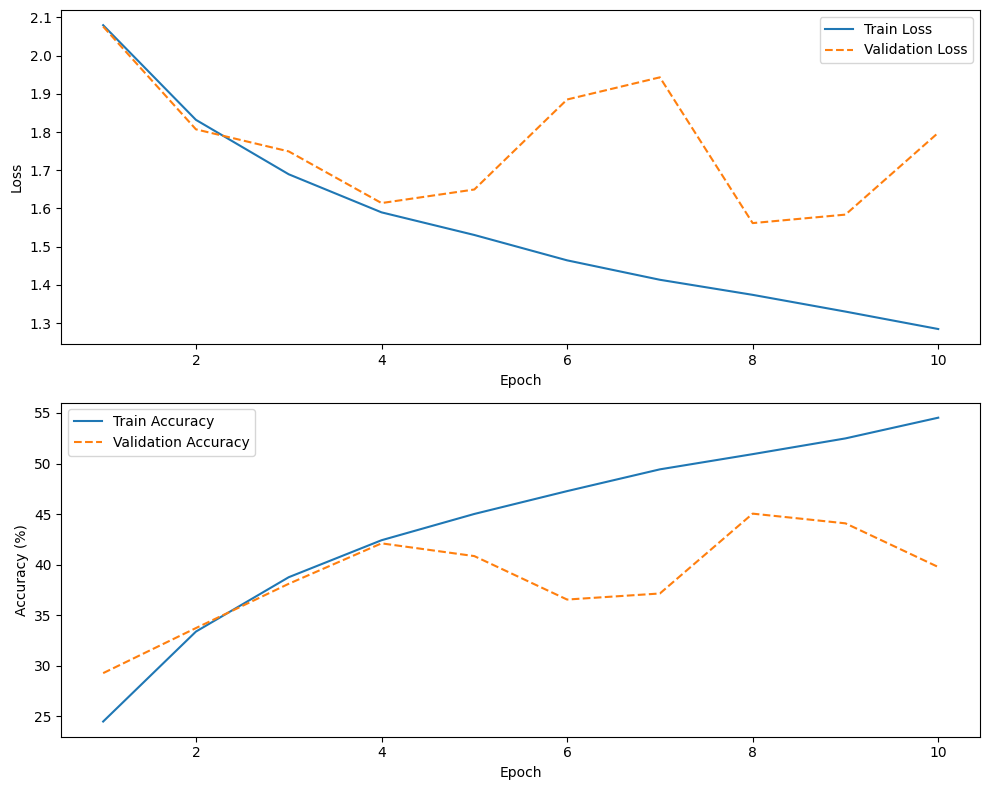

In [ ]:

# Plotting the loss and accuracy curves
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.plot(range(1, epochs+1), train_losses, label='Train Loss')
ax1.plot(range(1, epochs+1), val_losses, label='Validation Loss', linestyle='dashed')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
ax2.plot(range(1, epochs+1), val_accuracies, label='Validation Accuracy', linestyle='dashed')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()

plt.tight_layout()
plt.show()